In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

In [4]:
#load tha dataset
data=pd.read_csv('diabetes_with_names.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,NaN,85,66,29.0,0,26.6,0.351,NaN,0
2,8.0,183,64,0.0,0,NaN,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


In [6]:
data.shape

(768, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               766 non-null    float64
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             767 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,766.0,3.849869,3.372270,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,767.0,20.517601,15.954059,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,767.0,32.003911,7.883043,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,767.0,33.243807,11.767627,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
#missing values
data.isna().sum()

Pregnancies                 2
Glucose                     0
BloodPressure               0
SkinThickness               1
Insulin                     0
BMI                         1
DiabetesPedigreeFunction    0
Age                         1
Outcome                     0
dtype: int64

In [11]:
df=data.fillna (method='bfill')
df.isna().sum()

C:\Users\mevis\AppData\Local\Temp\ipykernel_18900\1212443010.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df=data.fillna (method='bfill')


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148,72,35.0,0,33.6,0.627,50.0,1
1,8.0,85,66,29.0,0,26.6,0.351,32.0,0
2,8.0,183,64,0.0,0,28.1,0.672,32.0,1
3,1.0,89,66,23.0,94,28.1,0.167,21.0,0
4,0.0,137,40,35.0,168,43.1,2.288,33.0,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

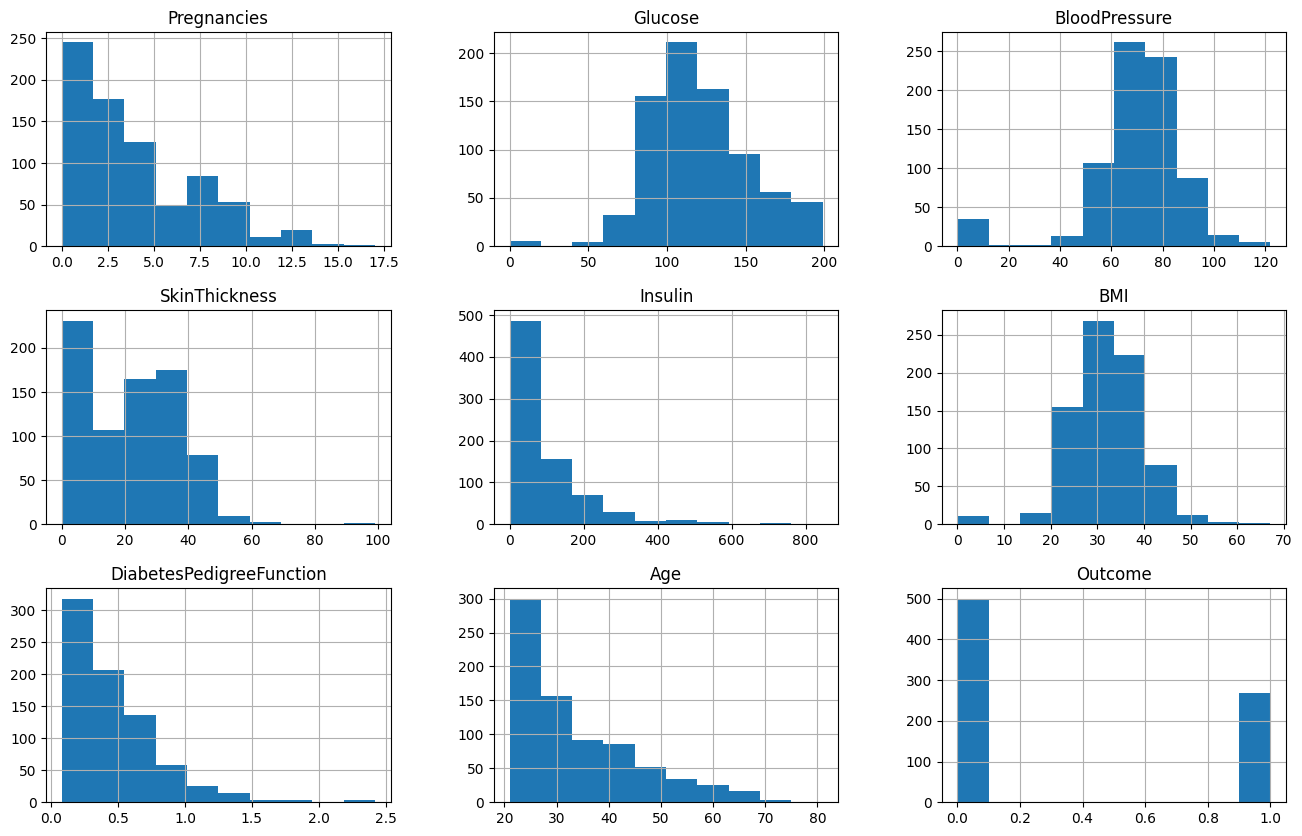

In [14]:
df.hist(figsize=(16,10))

<Axes: >

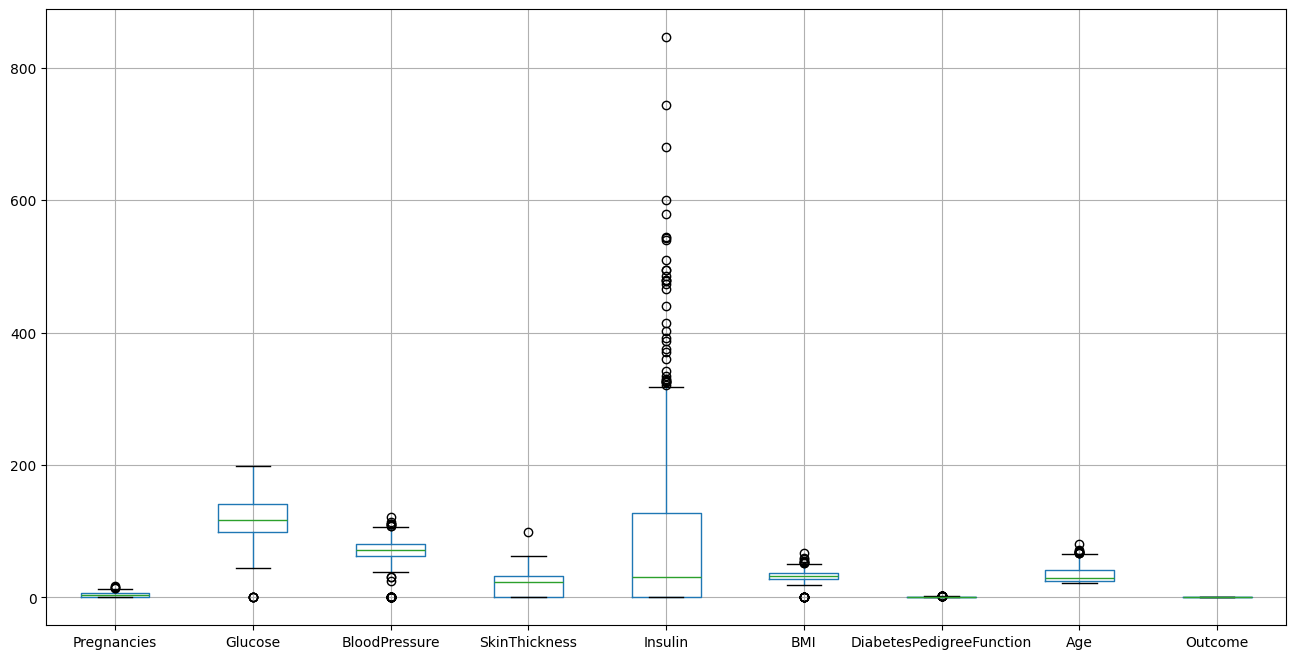

In [15]:
df.boxplot(figsize=(16,8))

<Axes: >

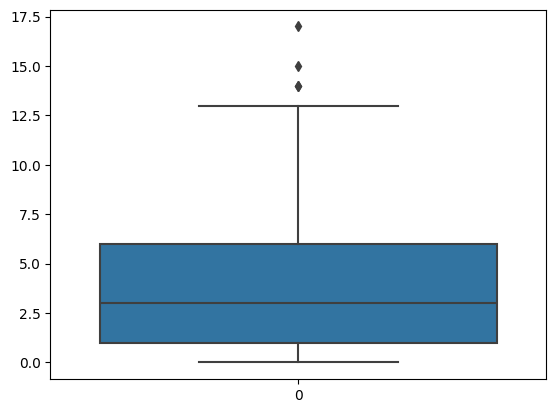

In [16]:
sns.boxplot(df['Pregnancies'])

C:\Users\mevis\AppData\Local\Temp\ipykernel_18900\4107119561.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BMI'])
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='BMI', ylabel='Density'>

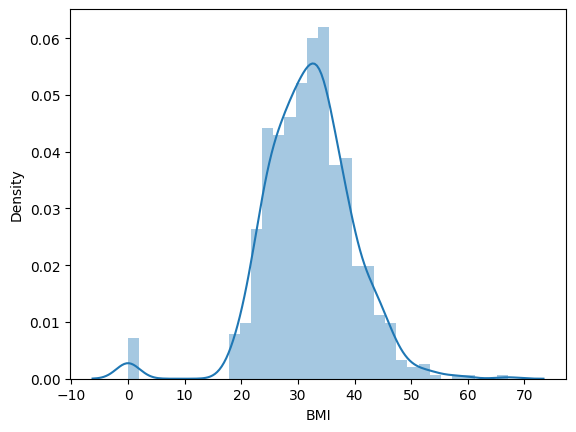

In [17]:
sns.distplot(df['BMI'])

C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

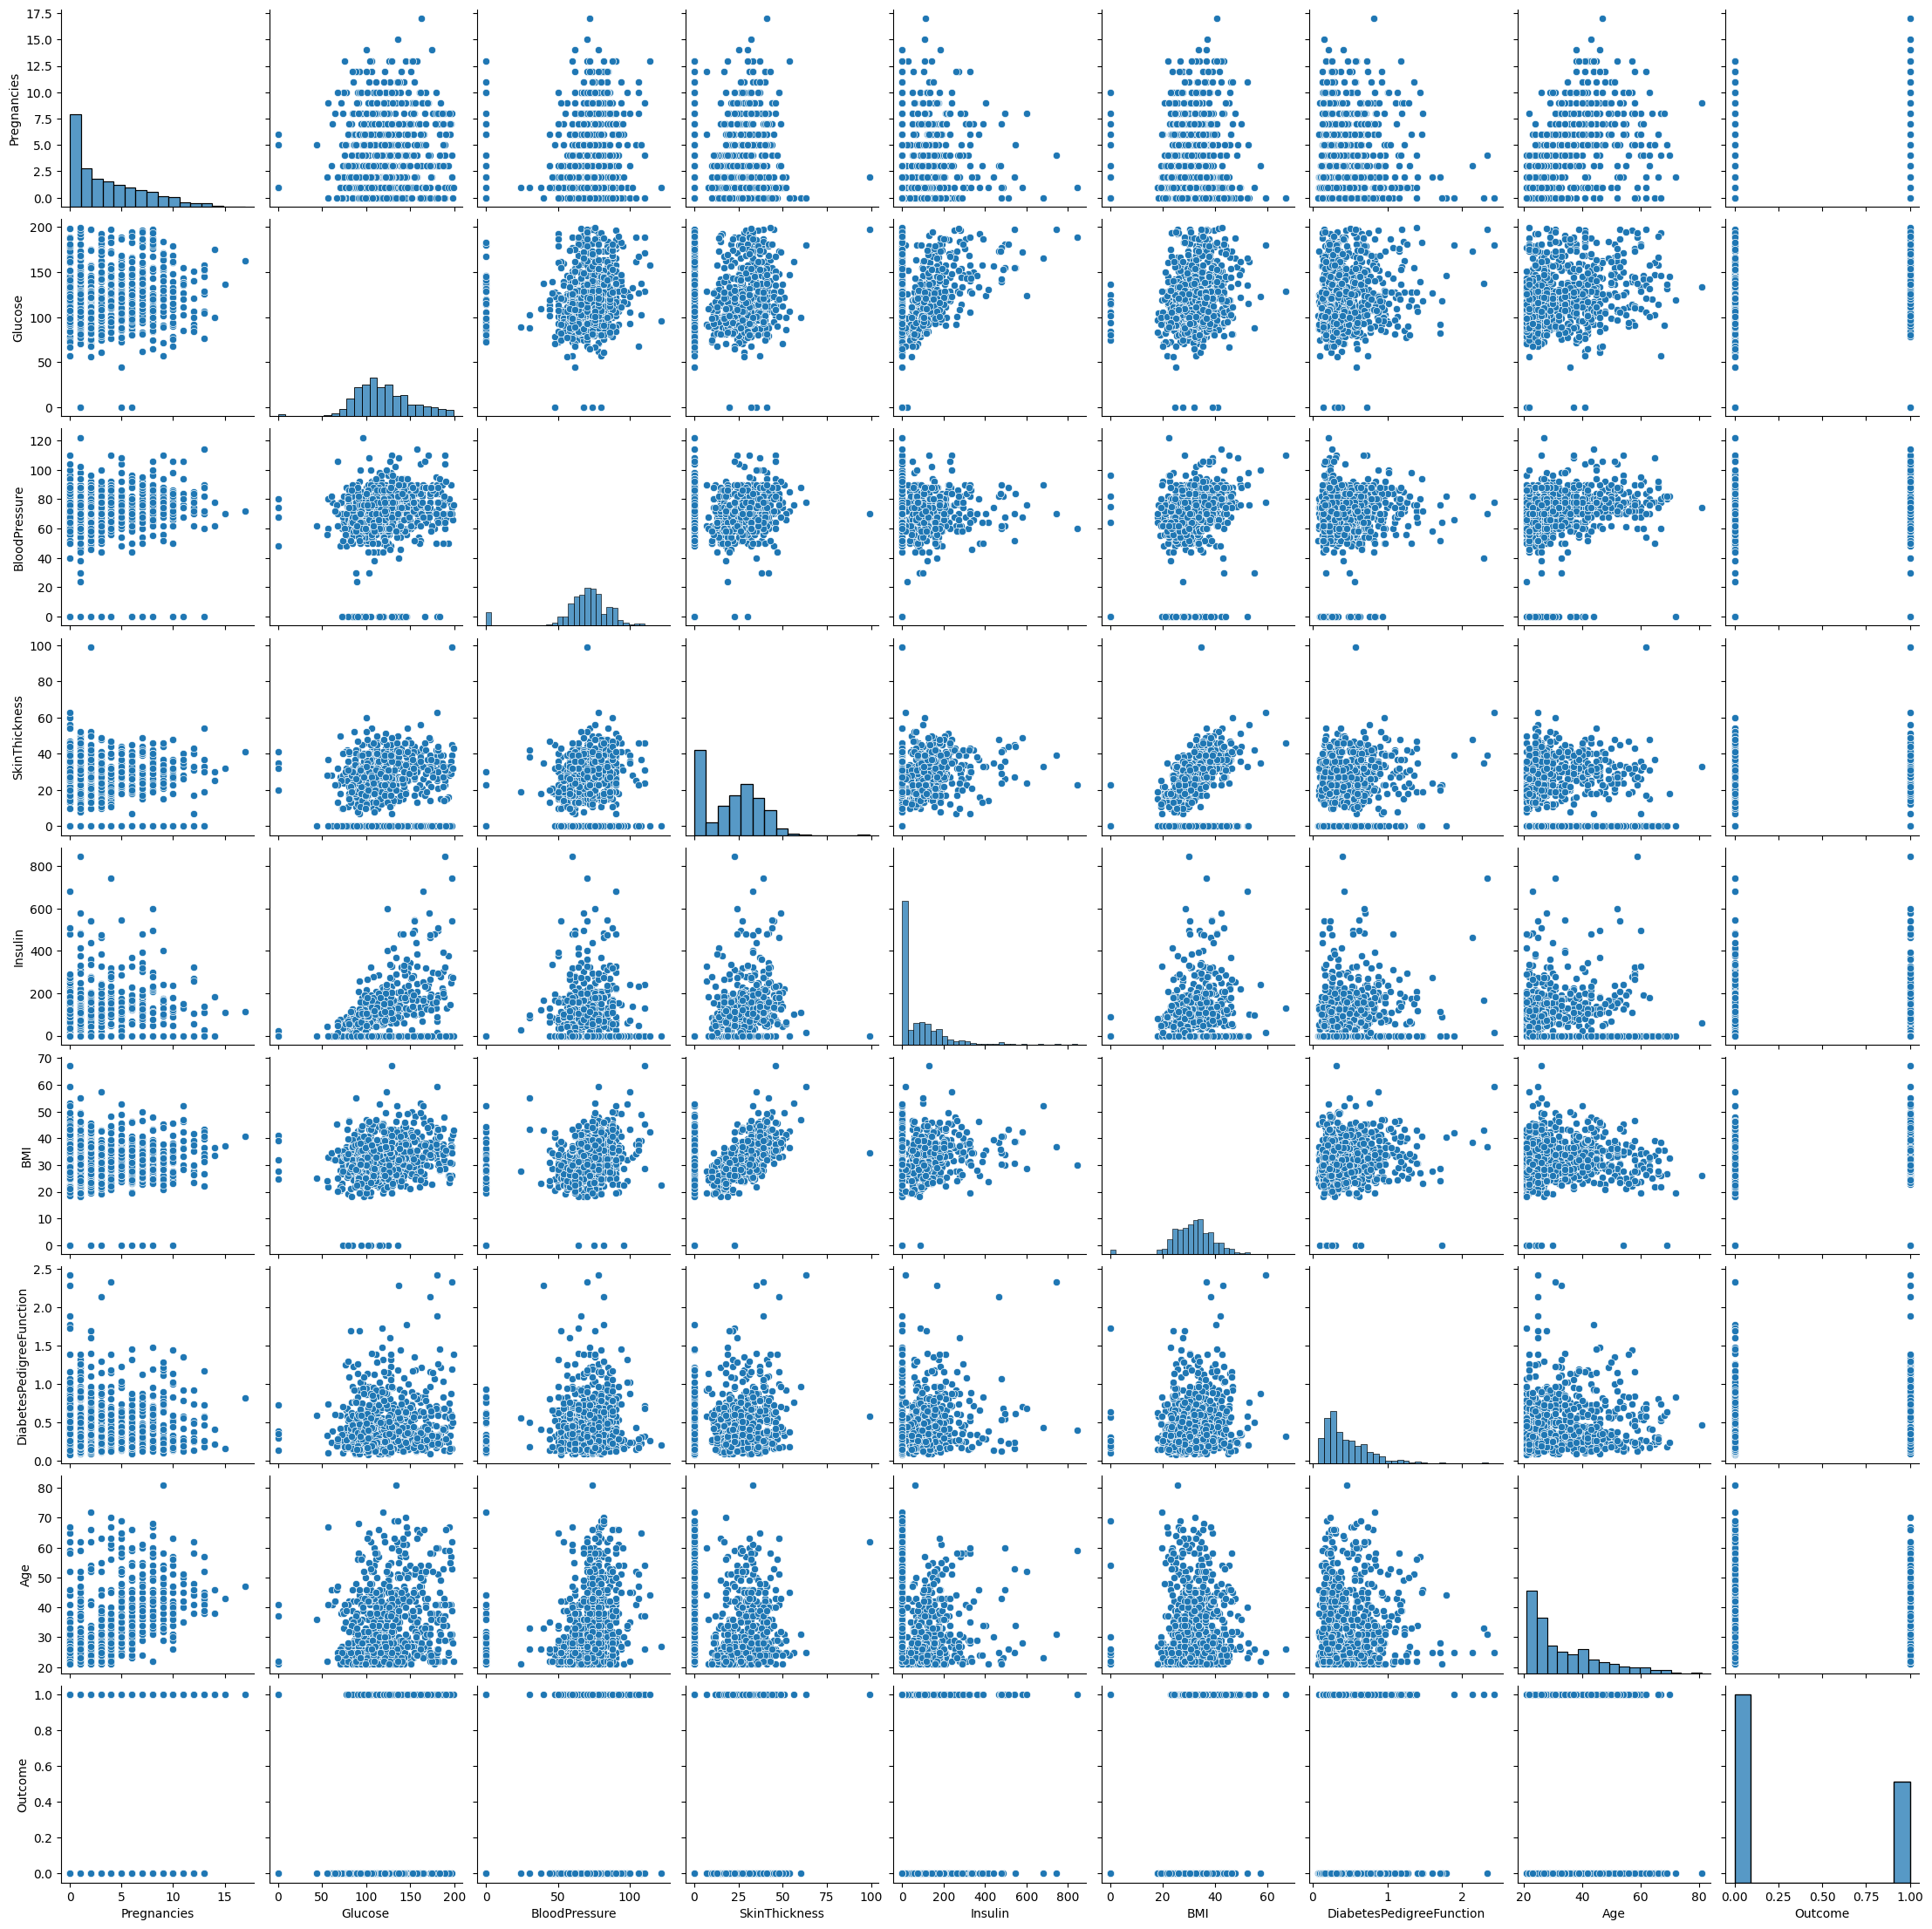

In [18]:
sns.pairplot(df)

C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\mevis\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

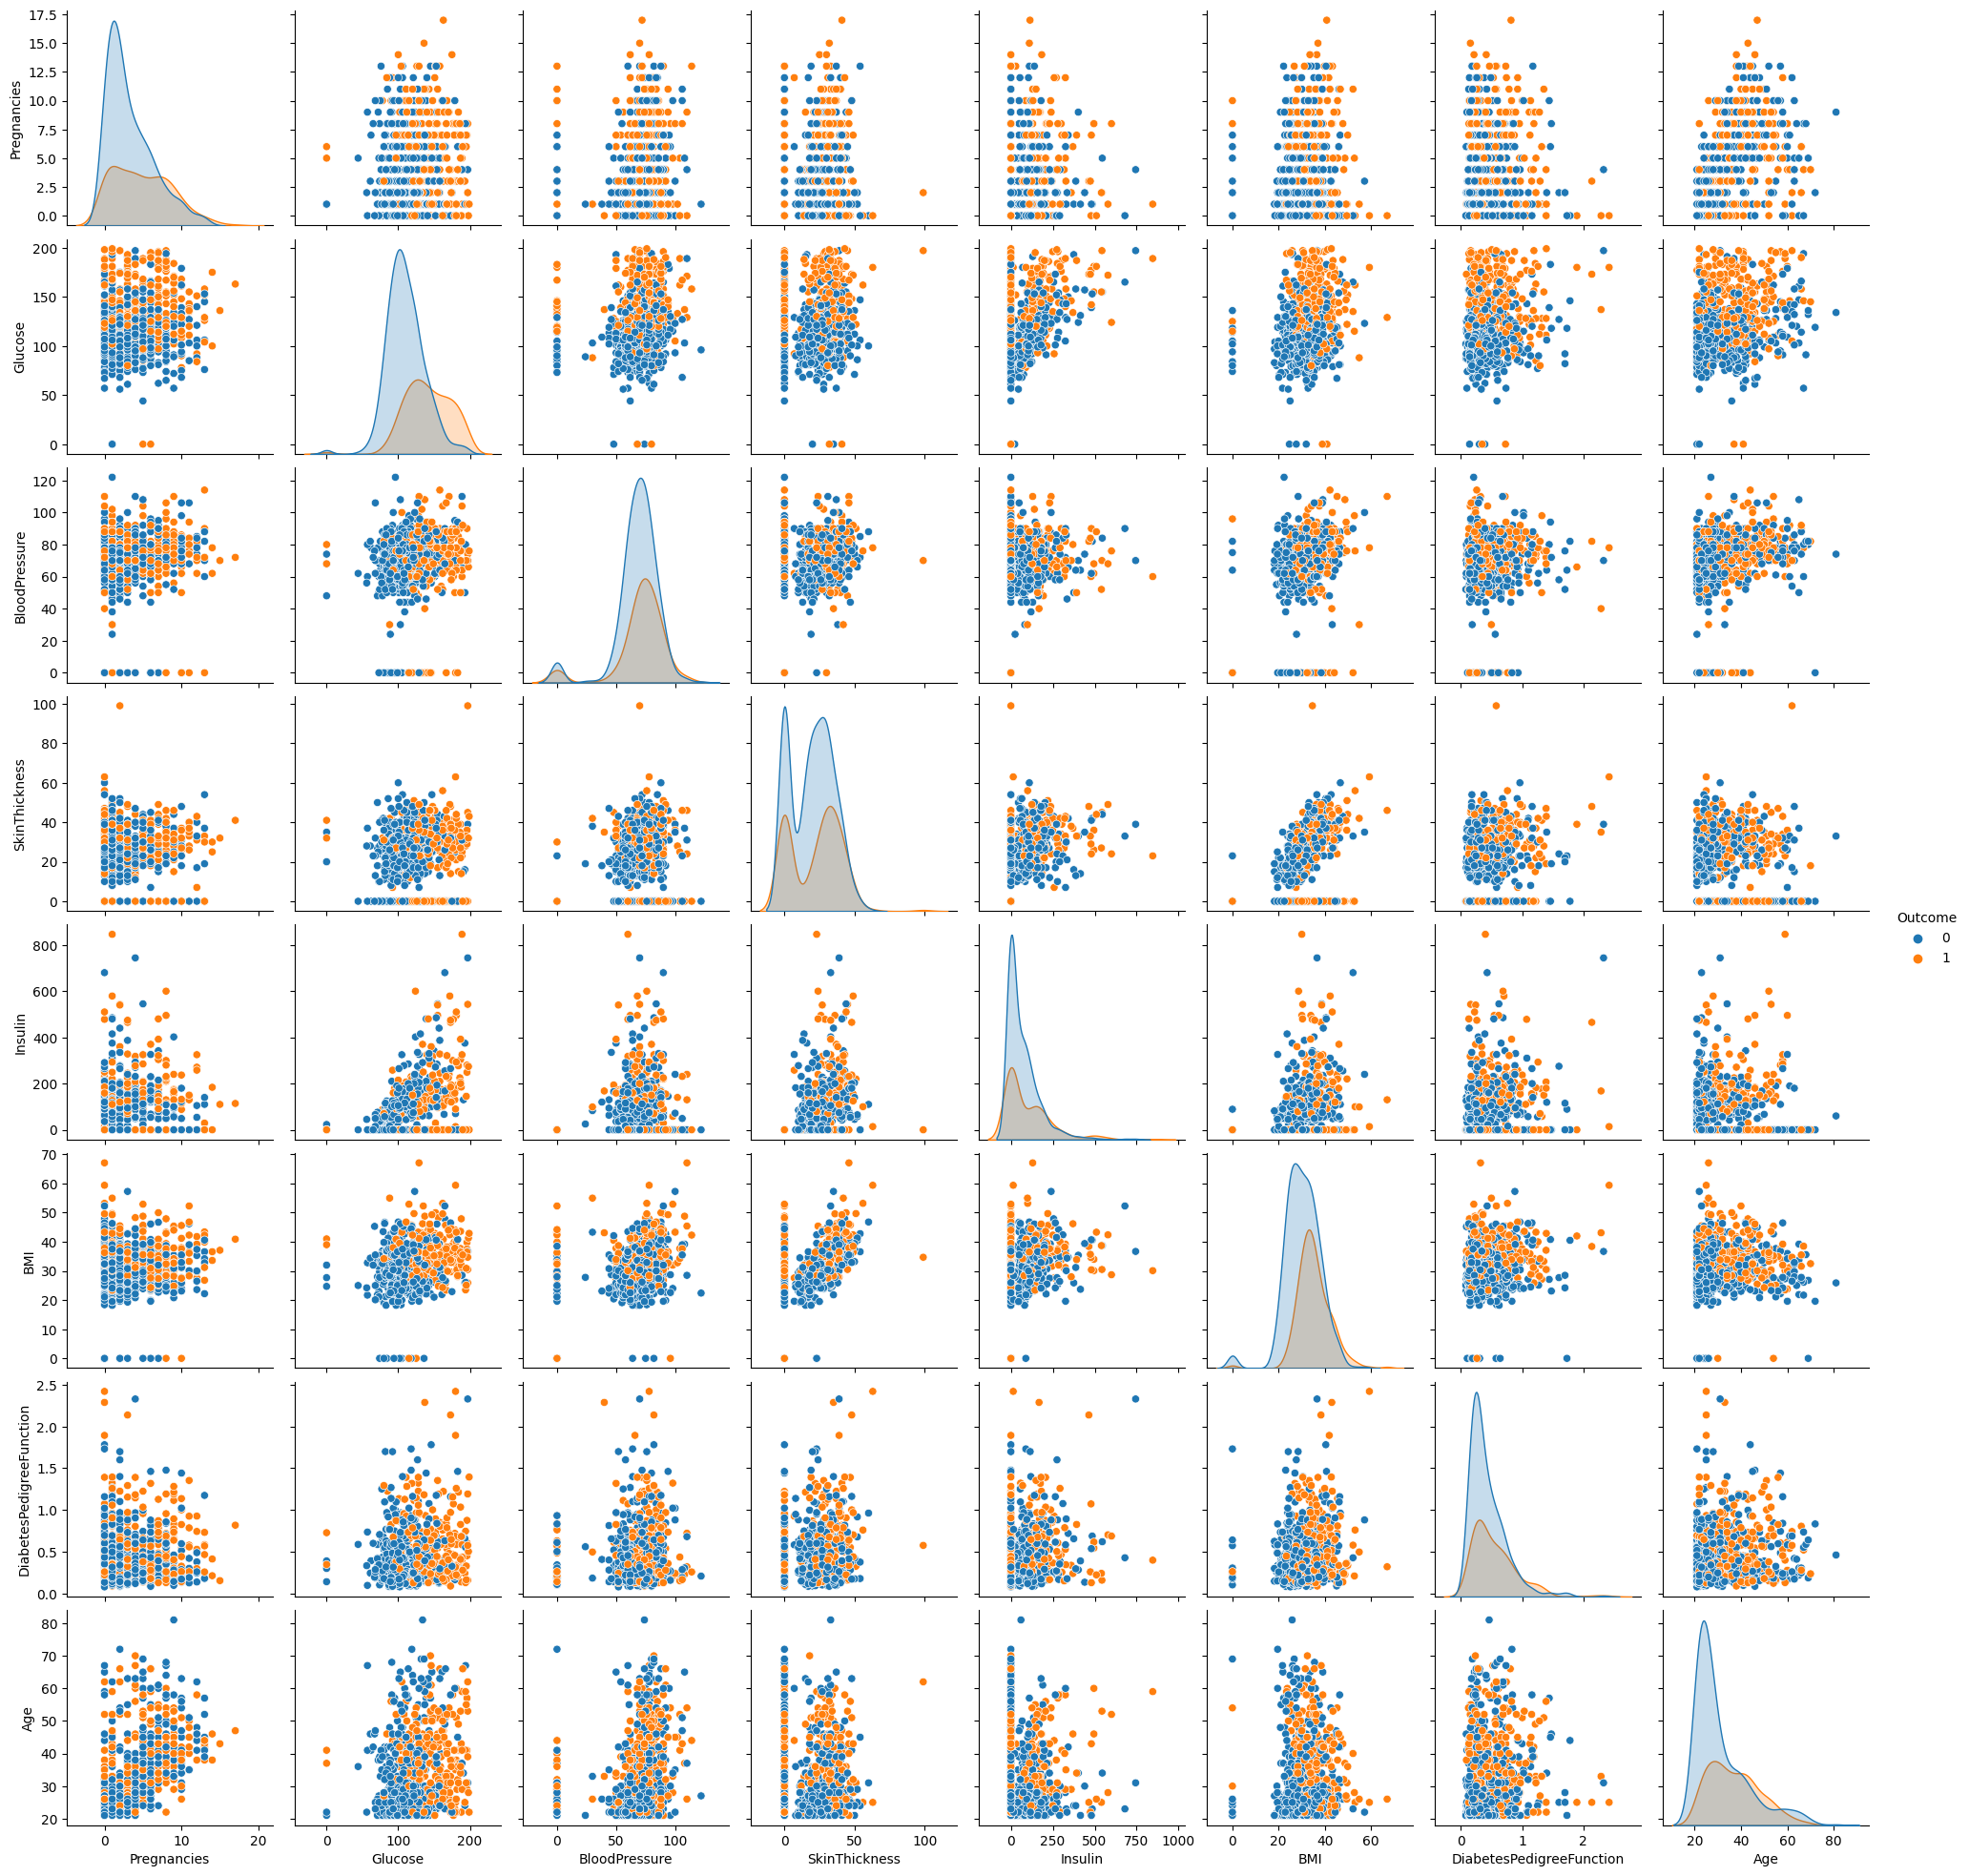

In [21]:
sns.pairplot(df,hue = 'Outcome')

In [23]:
x=df.iloc[:,:-1] 
y=df.iloc[:, -1:].values

print(x.head(2))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0          6.0      148             72           35.0        0  33.6   
1          8.0       85             66           29.0        0  26.6   

   DiabetesPedigreeFunction   Age  
0                     0.627  50.0  
1                     0.351  32.0  


In [24]:
x.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35.0,0,33.6,0.627,50.0
1,8.0,85,66,29.0,0,26.6,0.351,32.0


In [25]:
y


array([[1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
    

<Axes: ylabel='count'>

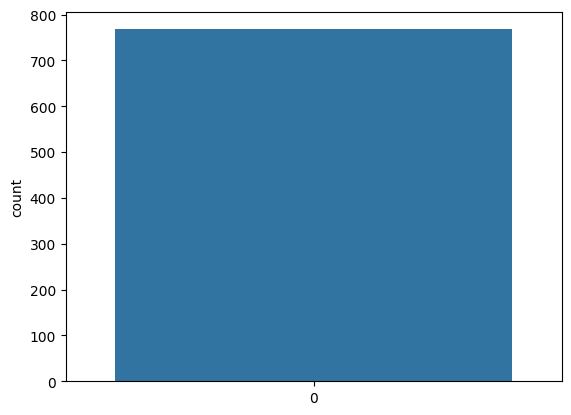

In [26]:
sns.countplot(df['Outcome'])

In [33]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=1)

print('************Training Data Shape********\n')

print('Training data-X- Shape:\t', xtrain.shape)

print()

print('Training data-y- Shape:\t', ytrain.shape)

print()

print('***************Testing Data Shape********\n')

print('Testing data (x-Input) Shape:\t', xtest.shape)

print() 

print('Testing data (y-Outcome) Shape:\t', ytest.shape)


************Training Data Shape********

Training data-X- Shape:	 (576, 8)

Training data-y- Shape:	 (576, 1)

***************Testing Data Shape********

Testing data (x-Input) Shape:	 (192, 8)

Testing data (y-Outcome) Shape:	 (192, 1)


In [35]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
log_reg = LogisticRegression(solver='liblinear', verbose=2)

# Train the model
print('Training the model\n')
log_reg.fit(xtrain, ytrain)

# Test the model
ypred = log_reg.predict(xtest)

print('Predicted Label for the input samples: \n', ypred)
print()
print('Testing is completed\n')
print('Number of testing samples: \t', len(ypred))


Training the model

[LibLinear]Predicted Label for the input samples: 
 [0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 0 0]

Testing is completed

Number of testing samples: 	 192


C:\Users\mevis\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Calculate and print performance measures
print("* *******Performance Measures for Logistic Regression Classifier")
print('Accuracy Score:\n', accuracy_score(ytest, ypred))
print('='*80)
print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
print('='*80)
print('Classification Report:\n', classification_report(ytest, ypred))
print('='*80)


* *******Performance Measures for Logistic Regression Classifier
Accuracy Score:
 0.78125
Confusion Matrix:
 [[110  13]
 [ 29  40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       123
           1       0.75      0.58      0.66        69

    accuracy                           0.78       192
   macro avg       0.77      0.74      0.75       192
weighted avg       0.78      0.78      0.77       192



In [37]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
log_reg.classes_

array([0, 1], dtype=int64)

In [39]:
log_reg.decision_function

<bound method LinearClassifierMixin.decision_function of LogisticRegression(solver='liblinear', verbose=2)>

In [40]:
log_reg.dual

False

In [41]:
log_reg.feature_names_in_

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], dtype=object)

In [42]:
log_reg.fit_intercept

True

In [45]:
intercept = log_reg.intercept_
print("Intercept (bias) term:", intercept)


Intercept (bias) term: [-5.34250697]


In [44]:
log_reg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 2,
 'warm_start': False}

In [46]:
y_probs=log_reg.predict_proba (xtest)[:,1]
y_probs

array([0.4361278 , 0.37453502, 0.23225571, 0.06845061, 0.23455103,
       0.28417324, 0.38190149, 0.1799471 , 0.17681256, 0.23260563,
       0.40768796, 0.10697493, 0.92139553, 0.68977635, 0.06923402,
       0.66745228, 0.25041146, 0.31910164, 0.27842289, 0.23193307,
       0.38306385, 0.17236119, 0.92616862, 0.33537231, 0.11629696,
       0.38632851, 0.21267852, 0.69509406, 0.10904448, 0.47751348,
       0.37450308, 0.47912052, 0.10109367, 0.63554402, 0.16025362,
       0.52271193, 0.14142024, 0.21720386, 0.15040066, 0.57456919,
       0.22718757, 0.13569198, 0.0699327 , 0.2435875 , 0.11858763,
       0.06023407, 0.7167866 , 0.75862842, 0.15011213, 0.19783826,
       0.05061527, 0.22158916, 0.79714801, 0.09994569, 0.64035251,
       0.14056807, 0.70577799, 0.32875677, 0.49502792, 0.22051166,
       0.60168694, 0.07009528, 0.72680246, 0.23686165, 0.3117429 ,
       0.17811682, 0.02522571, 0.30104851, 0.6595095 , 0.55967588,
       0.84345266, 0.65477135, 0.52527859, 0.04477266, 0.62939

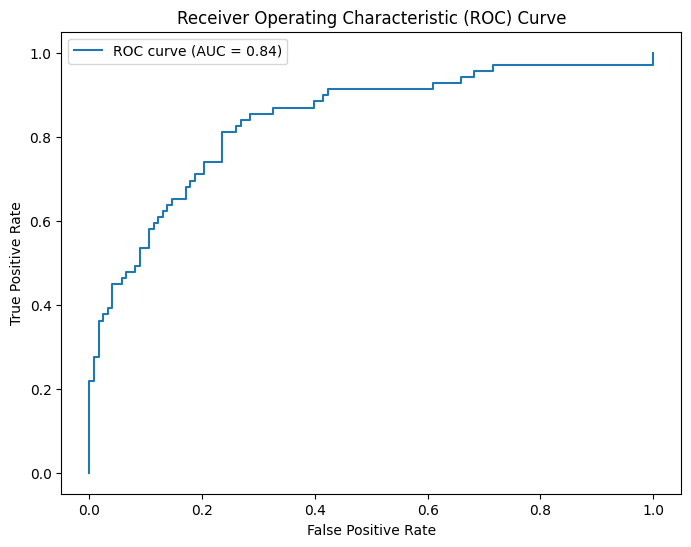

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [49]:
roc_curve

<function sklearn.metrics._ranking.roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [50]:
cm=confusion_matrix(ytest, ypred)
cm

array([[110,  13],
       [ 29,  40]], dtype=int64)

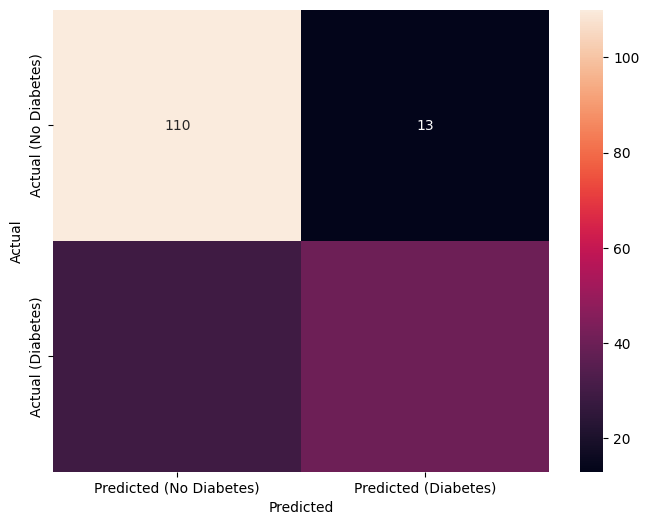

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that `cm` is your confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Predicted (No Diabetes)', 'Predicted (Diabetes)'], yticklabels=['Actual (No Diabetes)', 'Actual (Diabetes)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [52]:
df[ 'Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64